,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


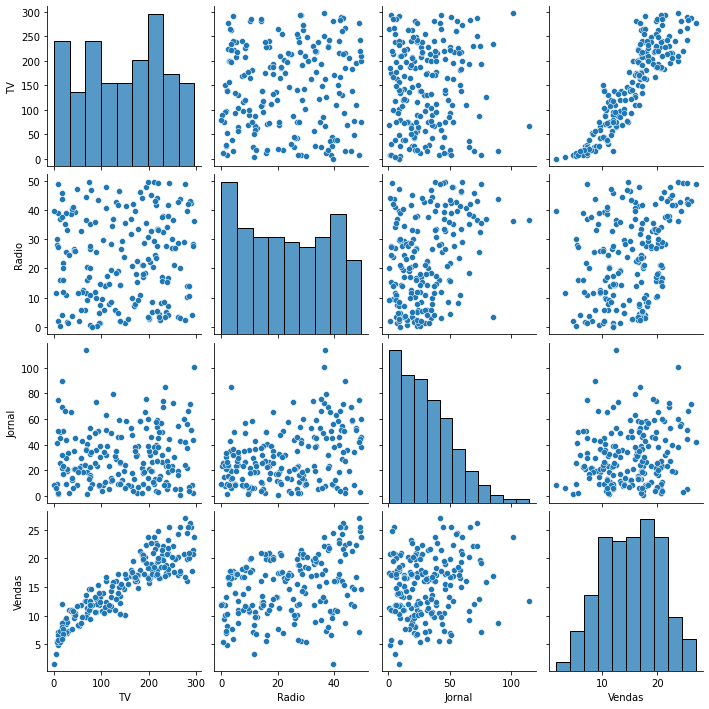

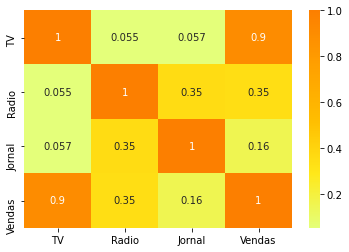

R2 da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 1.5396947656031235
R2 do random Forest: 0.9614718164447933
RSME do Random Forest: 0.9916340722934721


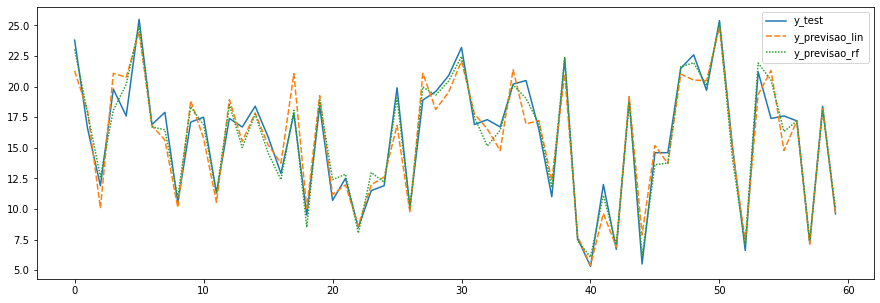

,y_test,y_previsao_lin,y_previsao_rf
0,23.8,21.288161,23.057
1,16.6,18.042132,17.860
2,11.9,10.059590,12.634
3,19.8,21.082241,18.066
4,17.6,20.764760,20.194
5,25.5,24.471874,24.929
6,16.9,16.806436,16.707
7,17.9,15.628857,16.471
8,10.5,10.124799,10.967
9,17.1,18.846019,18.359


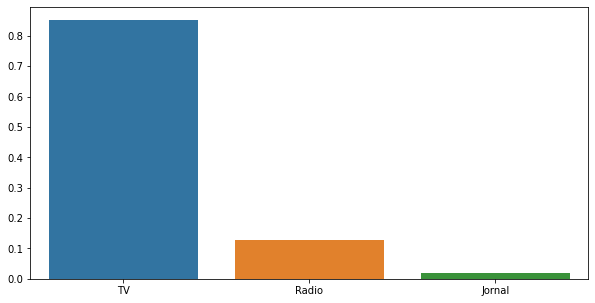

In [20]:
#criar um modelo de previsão de vendas baseado nos dados de investimento nos diferentes canais.

import pandas as pd
import seaborn as sns #criacao de graficos
import matplotlib.pyplot as plt #plotar graficos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np #biblioteca utilizada para grande volume de calculos


df = pd.read_csv("advertising.csv")
display(df) #mostra tabela
print (df.info()) #melhor visualizacao para verificar se os dados precisam ser tratados

sns.pairplot(df) #indica tipo de grafico que sera utilizado
plt.show() #exibe o grafico

#utilizar outro metodo da sns para conseguir avaliar melhor os dados:
sns.heatmap(df.corr(), cmap = "Wistia", annot = True)
plt.show()

#df.corr() -> esse argumento indica o que está sendo plotado. Nesse caso, df.corr() indica que será calculado a CORRELAÇÃO* entre os dados do dataframe df.
#cmap = ‘Wistia’ ->indica a paleta de cores a ser utilizada no gráfico
#annot= Escreve dentro dos quadrados o valor

#criacao de um modelo
x = df.drop("Vendas", axis=1)
y = df["Vendas"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

#teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R2 da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")
r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R2 do random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rmse_rf}")


#construindo o grafico de previsao
df_resultado = pd.DataFrame()
df_resultado["y_test"] = y_test
df_resultado["y_previsao_lin"] = test_pred_lin
df_resultado["y_previsao_rf"] = test_pred_rf
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data = df_resultado)
plt.show()
display(df_resultado)

#importancia de cada produto para as vendas
plt.figure(figsize=(10, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()